<a href="https://colab.research.google.com/github/SantiagoGomezfpv/hyperparameter/blob/main/Clasificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Técnicas tradicionales clasificadores**

In [2]:
!pip install optuna scikit-learn xgboost matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.3 MB/s eta 0:00:00


In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

# Función para generar y dividir datos
def generate_and_split_data(generator, test_size=0.2, random_state=42):
    X, y = generator
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Generar conjuntos de datos
datasets = {
    'make_moons': make_moons(noise=0.3, random_state=0),
    'make_circles': make_circles(noise=0.2, factor=0.5, random_state=1),
    'make_classification': make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
}

## **Random Forest + Optuna**

In [11]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Definir función objetivo para Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

# Crear y optimizar estudio con Optuna para cada conjunto de datos
best_params_rf = {}
for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))
    study_rf = optuna.create_study(direction='maximize')
    study_rf.optimize(objective_rf, n_trials=50)
    best_params_rf[ds_name] = study_rf.best_params
    print(f'Best parameters for Random Forest on {ds_name}: {study_rf.best_params}')

[I 2024-06-04 13:45:08,218] A new study created in memory with name: no-name-22c9ffa9-7f54-4ff3-b396-d27da5552770
[I 2024-06-04 13:45:09,676] Trial 0 finished with value: 0.9368471035137702 and parameters: {'n_estimators': 169, 'max_depth': 14, 'min_samples_split': 3}. Best is trial 0 with value: 0.9368471035137702.
[I 2024-06-04 13:45:11,749] Trial 1 finished with value: 0.9249762583095915 and parameters: {'n_estimators': 184, 'max_depth': 8, 'min_samples_split': 7}. Best is trial 0 with value: 0.9368471035137702.
[I 2024-06-04 13:45:11,910] Trial 2 finished with value: 0.8988603988603989 and parameters: {'n_estimators': 10, 'max_depth': 31, 'min_samples_split': 3}. Best is trial 0 with value: 0.9368471035137702.
[I 2024-06-04 13:45:13,669] Trial 3 finished with value: 0.9373219373219372 and parameters: {'n_estimators': 198, 'max_depth': 31, 'min_samples_split': 5}. Best is trial 3 with value: 0.9373219373219372.
[I 2024-06-04 13:45:14,376] Trial 4 finished with value: 0.8993352326685

Best parameters for Random Forest on make_moons: {'n_estimators': 133, 'max_depth': 11, 'min_samples_split': 4}


[I 2024-06-04 13:45:41,223] Trial 0 finished with value: 0.8504273504273504 and parameters: {'n_estimators': 105, 'max_depth': 12, 'min_samples_split': 6}. Best is trial 0 with value: 0.8504273504273504.
[I 2024-06-04 13:45:41,352] Trial 1 finished with value: 0.8380816714150048 and parameters: {'n_estimators': 34, 'max_depth': 30, 'min_samples_split': 14}. Best is trial 0 with value: 0.8504273504273504.
[I 2024-06-04 13:45:41,546] Trial 2 finished with value: 0.8627730294396961 and parameters: {'n_estimators': 49, 'max_depth': 5, 'min_samples_split': 15}. Best is trial 2 with value: 0.8627730294396961.
[I 2024-06-04 13:45:41,902] Trial 3 finished with value: 0.8751187084520419 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 10}. Best is trial 3 with value: 0.8751187084520419.
[I 2024-06-04 13:45:42,571] Trial 4 finished with value: 0.8627730294396961 and parameters: {'n_estimators': 167, 'max_depth': 8, 'min_samples_split': 15}. Best is trial 3 with value: 0.

Best parameters for Random Forest on make_circles: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 10}


[I 2024-06-04 13:46:04,332] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 182, 'max_depth': 28, 'min_samples_split': 15}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:04,426] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 12, 'max_depth': 4, 'min_samples_split': 4}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:04,530] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 11, 'max_depth': 23, 'min_samples_split': 15}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:05,354] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 122, 'max_depth': 24, 'min_samples_split': 13}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:06,082] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 111, 'max_depth': 3, 'min_samples_split': 7}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:06,833] Trial 5 finished with value: 1.0 and parameters: {'n_estimators': 97, 'max_depth': 25, 'min_samples_spl

Best parameters for Random Forest on make_classification: {'n_estimators': 182, 'max_depth': 28, 'min_samples_split': 15}


## **K-nn + Optuna**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Definir función objetivo para Optuna
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

# Crear y optimizar estudio con Optuna para cada conjunto de datos
best_params_knn = {}
for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))
    study_knn = optuna.create_study(direction='maximize')
    study_knn.optimize(objective_knn, n_trials=50)
    best_params_knn[ds_name] = study_knn.best_params
    print(f'Best parameters for K-Neighbors on {ds_name}: {study_knn.best_params}')

[I 2024-06-04 13:46:34,454] A new study created in memory with name: no-name-6afbdc92-4758-4525-9fd6-001f4f7792f0
[I 2024-06-04 13:46:34,474] Trial 0 finished with value: 0.9373219373219372 and parameters: {'n_neighbors': 15}. Best is trial 0 with value: 0.9373219373219372.
[I 2024-06-04 13:46:34,495] Trial 1 finished with value: 0.8741690408357075 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.9373219373219372.
[I 2024-06-04 13:46:34,514] Trial 2 finished with value: 0.9121557454890787 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.9373219373219372.
[I 2024-06-04 13:46:34,533] Trial 3 finished with value: 0.949667616334283 and parameters: {'n_neighbors': 5}. Best is trial 3 with value: 0.949667616334283.
[I 2024-06-04 13:46:34,550] Trial 4 finished with value: 0.8746438746438746 and parameters: {'n_neighbors': 2}. Best is trial 3 with value: 0.949667616334283.
[I 2024-06-04 13:46:34,569] Trial 5 finished with value: 0.9368471035137702 and parame

Best parameters for K-Neighbors on make_moons: {'n_neighbors': 5}


[I 2024-06-04 13:46:36,496] Trial 8 finished with value: 0.6377018043684711 and parameters: {'n_neighbors': 17}. Best is trial 4 with value: 0.8865147198480532.
[I 2024-06-04 13:46:36,530] Trial 9 finished with value: 0.674738841405508 and parameters: {'n_neighbors': 20}. Best is trial 4 with value: 0.8865147198480532.
[I 2024-06-04 13:46:36,584] Trial 10 finished with value: 0.8494776828110161 and parameters: {'n_neighbors': 6}. Best is trial 4 with value: 0.8865147198480532.
[I 2024-06-04 13:46:36,631] Trial 11 finished with value: 0.8618233618233617 and parameters: {'n_neighbors': 1}. Best is trial 4 with value: 0.8865147198480532.
[I 2024-06-04 13:46:36,684] Trial 12 finished with value: 0.8618233618233617 and parameters: {'n_neighbors': 1}. Best is trial 4 with value: 0.8865147198480532.
[I 2024-06-04 13:46:36,726] Trial 13 finished with value: 0.8494776828110161 and parameters: {'n_neighbors': 6}. Best is trial 4 with value: 0.8865147198480532.
[I 2024-06-04 13:46:36,775] Trial 1

Best parameters for K-Neighbors on make_circles: {'n_neighbors': 10}


[I 2024-06-04 13:46:38,908] Trial 4 finished with value: 1.0 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:38,950] Trial 5 finished with value: 1.0 and parameters: {'n_neighbors': 19}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:38,989] Trial 6 finished with value: 1.0 and parameters: {'n_neighbors': 4}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:39,033] Trial 7 finished with value: 1.0 and parameters: {'n_neighbors': 9}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:39,074] Trial 8 finished with value: 1.0 and parameters: {'n_neighbors': 8}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:39,118] Trial 9 finished with value: 1.0 and parameters: {'n_neighbors': 8}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:39,176] Trial 10 finished with value: 1.0 and parameters: {'n_neighbors': 1}. Best is trial 0 with value: 1.0.
[I 2024-06-04 13:46:39,234] Trial 11 finished with value: 1.0 and parameters: {'n_neighb

Best parameters for K-Neighbors on make_classification: {'n_neighbors': 2}


## **SVM + Optuna**

(Support Vector Machines - Máquinas de vectores de soporte)

In [13]:
from sklearn.svm import SVC

# Definir función objetivo para Optuna
def objective_svc(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    clf = SVC(C=C, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

# Crear y optimizar estudio con Optuna para cada conjunto de datos
best_params_svc = {}
for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))
    study_svc = optuna.create_study(direction='maximize')
    study_svc.optimize(objective_svc, n_trials=50)
    best_params_svc[ds_name] = study_svc.best_params
    print(f'Best parameters for SVC on {ds_name}: {study_svc.best_params}')

[I 2024-06-04 13:46:40,583] A new study created in memory with name: no-name-3dca1a78-d3ef-42f4-80d8-d4c14b689701
[I 2024-06-04 13:46:40,597] Trial 0 finished with value: 0.9624881291547958 and parameters: {'C': 14.521400942921806}. Best is trial 0 with value: 0.9624881291547958.
[I 2024-06-04 13:46:40,608] Trial 1 finished with value: 0.5902184235517569 and parameters: {'C': 5.2720240606626105e-05}. Best is trial 0 with value: 0.9624881291547958.
[I 2024-06-04 13:46:40,619] Trial 2 finished with value: 0.9624881291547958 and parameters: {'C': 15.295160910258014}. Best is trial 0 with value: 0.9624881291547958.
[I 2024-06-04 13:46:40,629] Trial 3 finished with value: 0.949667616334283 and parameters: {'C': 7.091810569433029}. Best is trial 0 with value: 0.9624881291547958.
[I 2024-06-04 13:46:40,644] Trial 4 finished with value: 0.5902184235517569 and parameters: {'C': 0.03375981793476622}. Best is trial 0 with value: 0.9624881291547958.
[I 2024-06-04 13:46:40,656] Trial 5 finished wit

Best parameters for SVC on make_moons: {'C': 14.521400942921806}


[I 2024-06-04 13:46:41,690] Trial 13 finished with value: 0.8504273504273504 and parameters: {'C': 55.08611604034863}. Best is trial 11 with value: 0.9245014245014245.
[I 2024-06-04 13:46:41,708] Trial 14 finished with value: 0.7502374169040835 and parameters: {'C': 0.1359247791392164}. Best is trial 11 with value: 0.9245014245014245.
[I 2024-06-04 13:46:41,728] Trial 15 finished with value: 0.5375118708452041 and parameters: {'C': 0.00011054055798767378}. Best is trial 11 with value: 0.9245014245014245.
[I 2024-06-04 13:46:41,757] Trial 16 finished with value: 0.5375118708452041 and parameters: {'C': 0.0032991578372970954}. Best is trial 11 with value: 0.9245014245014245.
[I 2024-06-04 13:46:41,782] Trial 17 finished with value: 0.8129154795821463 and parameters: {'C': 3653.419390162296}. Best is trial 11 with value: 0.9245014245014245.
[I 2024-06-04 13:46:41,802] Trial 18 finished with value: 0.899335232668566 and parameters: {'C': 2.1480824711945568}. Best is trial 11 with value: 0.

Best parameters for SVC on make_circles: {'C': 0.8725193239596829}


[I 2024-06-04 13:46:42,491] Trial 17 finished with value: 1.0 and parameters: {'C': 904641.1865573477}. Best is trial 1 with value: 1.0.
[I 2024-06-04 13:46:42,503] Trial 18 finished with value: 0.5123456790123456 and parameters: {'C': 0.0038803791961865186}. Best is trial 1 with value: 1.0.
[I 2024-06-04 13:46:42,523] Trial 19 finished with value: 0.5123456790123456 and parameters: {'C': 0.01778604875600173}. Best is trial 1 with value: 1.0.
[I 2024-06-04 13:46:42,537] Trial 20 finished with value: 1.0 and parameters: {'C': 23.79823255744293}. Best is trial 1 with value: 1.0.
[I 2024-06-04 13:46:42,555] Trial 21 finished with value: 1.0 and parameters: {'C': 5014.077324823375}. Best is trial 1 with value: 1.0.
[I 2024-06-04 13:46:42,573] Trial 22 finished with value: 1.0 and parameters: {'C': 12607.730748547112}. Best is trial 1 with value: 1.0.
[I 2024-06-04 13:46:42,590] Trial 23 finished with value: 1.0 and parameters: {'C': 31485.78417796846}. Best is trial 1 with value: 1.0.
[I 2

Best parameters for SVC on make_classification: {'C': 16077.511053735032}


## **XGBoost + Optuna**

In [14]:
import xgboost as xgb

# Definir función objetivo para Optuna
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)

    clf = xgb.XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        random_state=42
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

# Crear y optimizar estudio con Optuna para cada conjunto de datos
best_params_xgb = {}
for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))
    study_xgb = optuna.create_study(direction='maximize')
    study_xgb.optimize(objective_xgb, n_trials=50)
    best_params_xgb[ds_name] = study_xgb.best_params
    print(f'Best parameters for XGBoost on {ds_name}: {study_xgb.best_params}')

[I 2024-06-04 13:46:42,964] A new study created in memory with name: no-name-6a516aec-0b85-43fe-9515-ba2384dfcf6d
[I 2024-06-04 13:46:43,067] Trial 0 finished with value: 0.8622981956315289 and parameters: {'n_estimators': 193, 'max_depth': 19, 'learning_rate': 0.0548998056090992}. Best is trial 0 with value: 0.8622981956315289.
[I 2024-06-04 13:46:43,119] Trial 1 finished with value: 0.8879392212725546 and parameters: {'n_estimators': 72, 'max_depth': 21, 'learning_rate': 0.026847681866788882}. Best is trial 1 with value: 0.8879392212725546.
[I 2024-06-04 13:46:43,171] Trial 2 finished with value: 0.8751187084520419 and parameters: {'n_estimators': 99, 'max_depth': 17, 'learning_rate': 0.1257609324153887}. Best is trial 1 with value: 0.8879392212725546.
[I 2024-06-04 13:46:43,275] Trial 3 finished with value: 0.8879392212725546 and parameters: {'n_estimators': 192, 'max_depth': 27, 'learning_rate': 0.010660245195002374}. Best is trial 1 with value: 0.8879392212725546.
[I 2024-06-04 13

Best parameters for XGBoost on make_moons: {'n_estimators': 72, 'max_depth': 21, 'learning_rate': 0.026847681866788882}


[I 2024-06-04 13:46:46,549] Trial 3 finished with value: 0.8380816714150048 and parameters: {'n_estimators': 190, 'max_depth': 16, 'learning_rate': 0.1930500464528399}. Best is trial 0 with value: 0.8504273504273504.
[I 2024-06-04 13:46:46,581] Trial 4 finished with value: 0.8380816714150047 and parameters: {'n_estimators': 34, 'max_depth': 8, 'learning_rate': 0.15469834143091252}. Best is trial 0 with value: 0.8504273504273504.
[I 2024-06-04 13:46:46,666] Trial 5 finished with value: 0.8380816714150047 and parameters: {'n_estimators': 162, 'max_depth': 12, 'learning_rate': 0.028508770469837408}. Best is trial 0 with value: 0.8504273504273504.
[I 2024-06-04 13:46:46,754] Trial 6 finished with value: 0.8380816714150047 and parameters: {'n_estimators': 124, 'max_depth': 14, 'learning_rate': 0.0558492593915506}. Best is trial 0 with value: 0.8504273504273504.
[I 2024-06-04 13:46:46,809] Trial 7 finished with value: 0.8380816714150047 and parameters: {'n_estimators': 85, 'max_depth': 8, 'l

Best parameters for XGBoost on make_circles: {'n_estimators': 160, 'max_depth': 19, 'learning_rate': 0.14979025003216848}


[I 2024-06-04 13:46:52,547] Trial 1 finished with value: 0.9876543209876543 and parameters: {'n_estimators': 109, 'max_depth': 16, 'learning_rate': 0.13047033612435951}. Best is trial 0 with value: 0.9876543209876543.
[I 2024-06-04 13:46:53,029] Trial 2 finished with value: 0.9876543209876543 and parameters: {'n_estimators': 109, 'max_depth': 28, 'learning_rate': 0.11859059826587116}. Best is trial 0 with value: 0.9876543209876543.
[I 2024-06-04 13:46:53,134] Trial 3 finished with value: 0.9876543209876543 and parameters: {'n_estimators': 157, 'max_depth': 12, 'learning_rate': 0.109933472615018}. Best is trial 0 with value: 0.9876543209876543.
[I 2024-06-04 13:46:53,199] Trial 4 finished with value: 0.9876543209876543 and parameters: {'n_estimators': 153, 'max_depth': 28, 'learning_rate': 0.0342843689997432}. Best is trial 0 with value: 0.9876543209876543.
[I 2024-06-04 13:46:53,258] Trial 5 finished with value: 0.9876543209876543 and parameters: {'n_estimators': 132, 'max_depth': 11, 

Best parameters for XGBoost on make_classification: {'n_estimators': 93, 'max_depth': 13, 'learning_rate': 0.0174044241582588}


# **Entrenar y Evaluar los Modelos con los Mejores Parámetros**

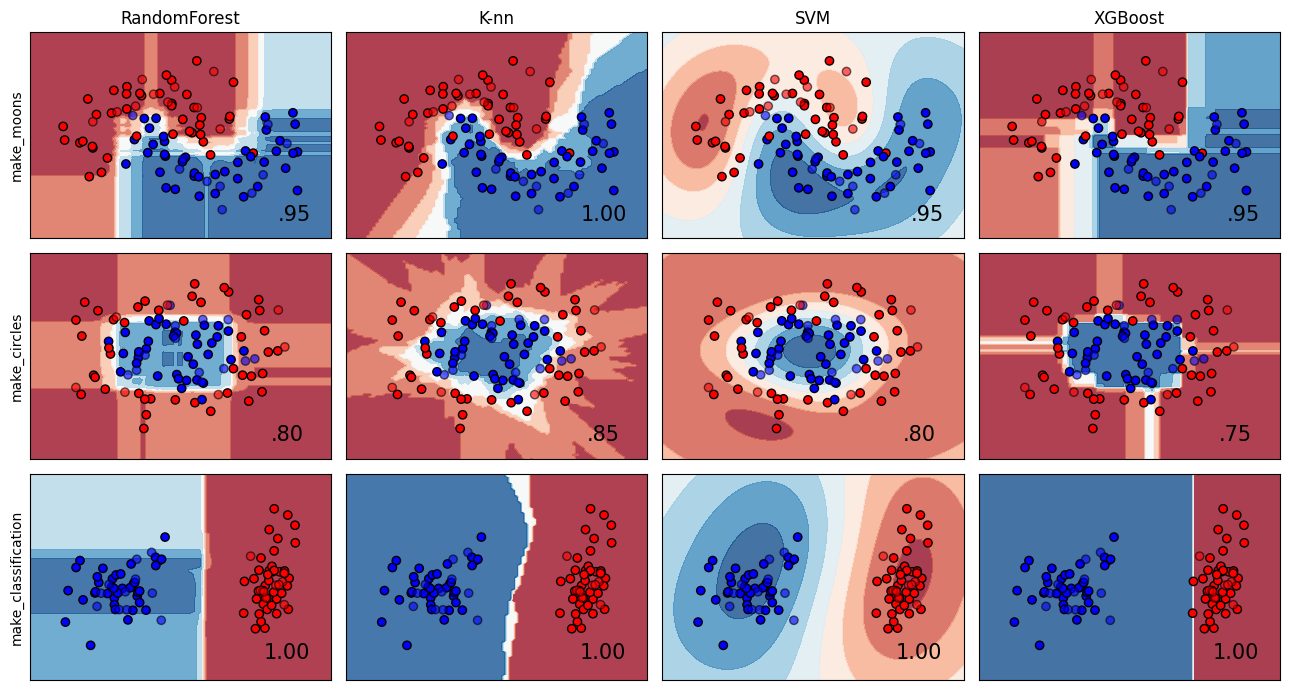

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Entrenar y evaluar los mejores modelos
results = {}
for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))

    # Random Forest
    best_rf = RandomForestClassifier(**best_params_rf[ds_name], random_state=42)
    best_rf.fit(X_train, y_train)
    accuracy_rf = best_rf.score(X_test, y_test)
    results[(ds_name, 'RandomForest')] = (best_rf, accuracy_rf)

    # K-Neighbors
    best_knn = KNeighborsClassifier(**best_params_knn[ds_name])
    best_knn.fit(X_train, y_train)
    accuracy_knn = best_knn.score(X_test, y_test)
    results[(ds_name, 'K-nn')] = (best_knn, accuracy_knn)

    # SVC
    best_svc = SVC(**best_params_svc[ds_name], random_state=42)
    best_svc.fit(X_train, y_train)
    accuracy_svc = best_svc.score(X_test, y_test)
    results[(ds_name, 'SVM')] = (best_svc, accuracy_svc)

    # XGBoost
    best_xgb = xgb.XGBClassifier(**best_params_xgb[ds_name], random_state=42)
    best_xgb.fit(X_train, y_train)
    accuracy_xgb = best_xgb.score(X_test, y_test)
    results[(ds_name, 'XGBoost')] = (best_xgb, accuracy_xgb)

    # Visualizar resultados
fig, axs = plt.subplots(len(datasets), len(results) // len(datasets), figsize=(13, 7))
axs = axs.reshape(len(datasets), -1)  # Asegurar que axs sea un array 2D
for i, (ds_name, (X, y)) in enumerate(datasets.items()):
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    for j, clf_name in enumerate(['RandomForest', 'K-nn', 'SVM', 'XGBoost']):
        ax = axs[i, j]
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(["#FF0000", "#0000FF"])

        clf, accuracy = results[(ds_name, clf_name)]

        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        ax.scatter(
            X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if i == 0:
            ax.set_title(clf_name)
        if j == 0:
            ax.set_ylabel(ds_name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % accuracy).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )

plt.tight_layout()
plt.show()